In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
scenarios = ['2-100', '2-50', '2-0', '4-100', '4-50', '4-0']
dirs = ['/nfs01/covid_sims/1594258249.2990654-asymptomatic_daily_self_report_p', 
        '/nfs01/covid_sims/1594258291.7132938-asymptomatic_daily_self_report_p',
        '/nfs01/covid_sims/1594258332.2034013-asymptomatic_daily_self_report_p',
        '/nfs01/covid_sims/1594258380.6924164-asymptomatic_daily_self_report_p',
        '/nfs01/covid_sims/1594258420.1672392-asymptomatic_daily_self_report_p',
        '/nfs01/covid_sims/1594258462.0895276-asymptomatic_daily_self_report_p']

In [63]:
for j, PATH in enumerate(dirs):
    os.chdir(PATH)
    results = glob.glob('**/simulation-0/*.csv', recursive=True) # simulatino-0 corresponds to daily testing frac = 0.2
    #print(len(results))
    n_trajectories = len(results)
    cum_QI = np.zeros(n_trajectories)
    cum_QS = np.zeros(n_trajectories)
    for i, res in enumerate(results):
        df = pd.read_csv(res)
        cum_QI[i] = df['QI'].iloc[-1]
        cum_QS[i] = df['QS'].iloc[-1]

    avg_cum_QI = np.mean(cum_QI)
    avg_cum_QS = np.mean(cum_QS)
    print('QI Avg = {}, QS Avg = {}, for scenario = {}'.format(avg_cum_QI, avg_cum_QS, scenarios[j]))
    

QI Avg = 169.38, QS Avg = 490.48, for scenario = 2-100
QI Avg = 235.08, QS Avg = 635.66, for scenario = 2-50
QI Avg = 291.35, QS Avg = 758.94, for scenario = 2-0
QI Avg = 178.74, QS Avg = 512.17, for scenario = 4-100
QI Avg = 300.85, QS Avg = 780.58, for scenario = 4-50
QI Avg = 417.65, QS Avg = 1041.16, for scenario = 4-0


53.32 2-100
55.91 4-50


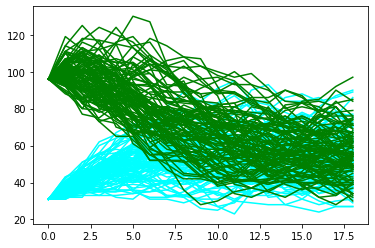

In [80]:
plt.figure()

# 2-100
PATH = '/nfs01/covid_sims/1594131630.841701-asymptomatic_daily_self_report_p'
os.chdir(PATH)
results = glob.glob('**/simulation-0/*.csv', recursive=True) # simulatino-0 corresponds to daily testing frac = 0.2
n_trajectories = len(results)
free = np.zeros(n_trajectories)

for i, res in enumerate(results):
    df = pd.read_csv(res)
    free_and_infectious = 34310 - df['S'] - df['QS'] - df['QI'] - df['R']
    free[i] = free_and_infectious.iloc[18]
    plt.plot(free_and_infectious, 'cyan')
  
print(free.mean(), '2-100')
    
# 4-50 
PATH = '/nfs01/covid_sims/1594131755.527977-asymptomatic_daily_self_report_p'
os.chdir(PATH)
results = glob.glob('**/simulation-0/*.csv', recursive=True) # simulatino-0 corresponds to daily testing frac = 0.2
free = np.zeros(n_trajectories)
for i, res in enumerate(results):
    df = pd.read_csv(res)
    free_and_infectious = 34310 - df['S'] - df['QS'] - df['QI'] - df['R']
    free[i] = free_and_infectious.iloc[18]
    plt.plot(free_and_infectious, 'g')
    
print(free.mean(), '4-50')
   
    
plt.show()